In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import signal
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error, r2_score
from IPython import display
import time
import IPython
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Text, Button
from IPython.display import display
import matplotlib.pyplot as plt

In [8]:
dataframe3 = pd.read_excel('COVID-19 US state policy database 6_10_2021.xlsx')
df2 = pd.read_csv('time_series_covid_19_confirmed_US.csv')

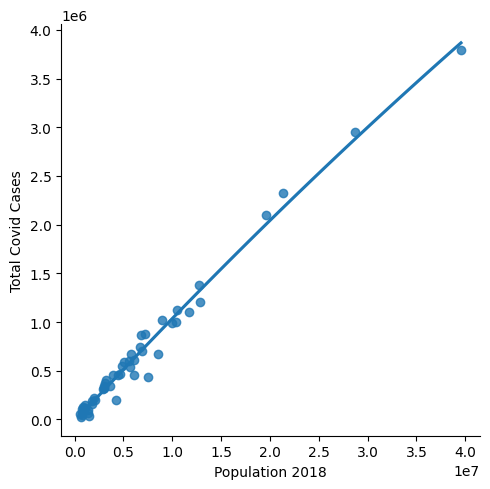

In [9]:
states = (df2['Province_State'].unique())
row = []
popValues = []
for state in states:
    r = df2.loc[df2["Province_State"] == state, "5/29/21"]
    sum_row = r.sum(axis=0)
    row.append(sum_row)
df = pd.DataFrame(row) 
df.columns = ["Total Covid Cases"]
for index, state in enumerate(states):
    df.rename(index={index: state}, inplace=True)
df = df.drop(["American Samoa", "Diamond Princess", "Grand Princess", "Northern Mariana Islands", "Guam", "Puerto Rico", "Virgin Islands" ], axis=0)
r = dataframe3.loc[:,"POP18"]
for index, val in enumerate(r):
    if index > 3:
        popValues.append(val)
df["Population 2018"] = popValues

sns.lmplot(x ="Population 2018", y ="Total Covid Cases", data = df, order = 2, ci = None)


In [16]:
"""
def linear_regression(X_test, y_test, alpha, iterations, num_image_updates):
    w = 0
    b = 0
    step_size = iterations/num_image_updates

    for i in range(iterations):
        dJ_dw = 0
        dJ_db = 0
        for j in range(len(X_test)):
            dJ_dw = dJ_dw + (1/len(X_test))*(w*X_test[j] + b - y_test[j])*X_test[j]
            dJ_db = dJ_db + (1/len(X_test))*(w*X_test[j] + b - y_test[j])
        w = w - alpha*dJ_dw
        b = b - alpha*dJ_db

        y_pred = np.empty([len(X_test), 1])
        for k in range(len(X_test)):
            y_pred[k]  = w*X_test[k] + b

        if i % step_size == 0:
            plt.clf()
            plt.scatter(X_test, y_test, color ='b')
            plt.plot(X_test, y_pred, color ='k')
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(1)
    
    parameters = (w, b)
    return parameters
    """

AttributeError: 'function' object has no attribute 'display'

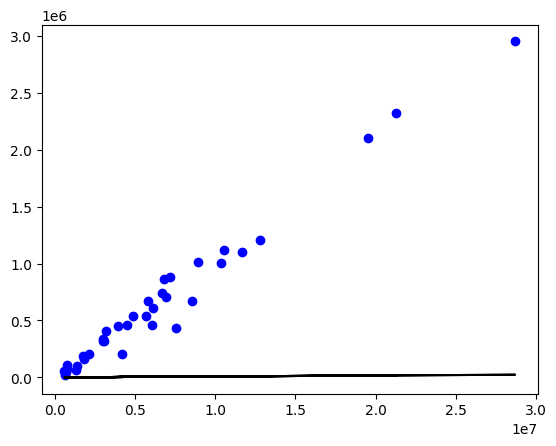

In [19]:
X = np.array(df['Population 2018']).reshape(-1, 1)
y = np.array(df['Total Covid Cases']).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

alpha = 10 ** -16
iterations = 1000
num_image_updates = 20
parameters = linear_regression(X_test, y_test, alpha, iterations, num_image_updates)
print(parameters)


#doesn't the lin regression function above already calculate and plot the predictions (line)?
y_pred = np.empty([len(X_test), 1])
for i in range(len(X_test)):
    y_pred[i]  = parameters[0]*X_test[i] + parameters[1]

plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

Sola's Edits

In [ ]:
def f(x):
    return x

def g(w, b):
    if(w != '' and b != ''):
        return int(w) + int(b)

In [ ]:
interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f(x)>

In [ ]:
interact(g, w = '', b = '')

interactive(children=(Text(value='', description='w'), Text(value='', description='b'), Output()), _dom_classe…

<function __main__.g(w, b)>

In [4]:
#version of linear regression with w, b text box functionality
def linear_regression(X_test, y_test, alpha, iterations, num_image_updates, has_w_b, w, b):
    
    if has_w_b == False:
        
        step_size = iterations/num_image_updates
    
        for i in range(iterations):
            dJ_dw = 0
            dJ_db = 0
            for j in range(len(X_test)):
                dJ_dw = dJ_dw + (1/len(X_test))*(w*X_test[j] + b - y_test[j])*X_test[j]
                dJ_db = dJ_db + (1/len(X_test))*(w*X_test[j] + b - y_test[j])
            w = w - alpha*dJ_dw
            b = b - alpha*dJ_db

            y_pred = np.empty([len(X_test), 1])
            for k in range(len(X_test)):
                y_pred[k]  = w*X_test[k] + b

            if i % step_size == 0:
                plt.clf()
                plt.scatter(X_test, y_test, color ='b')
                plt.plot(X_test, y_pred, color ='k')
                display.display(plt.gcf())
                display.clear_output(wait=True)
                time.sleep(1)
    else:
        y_pred = np.empty([len(X_test), 1])
        for k in range(len(X_test)):
            y_pred[k]  = w*X_test[k] + b

        
        plt.clf()
        plt.scatter(X_test, y_test, color ='b')
        plt.plot(X_test, y_pred, color ='k')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    
    parameters = (w, b)
    return parameters

In [3]:
def run_lin_reg(has_w_b, w, b):
    
    X = np.array(df['Population 2018']).reshape(-1, 1)
    y = np.array(df['Total Covid Cases']).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

    #make it so this info is obtained from sliders instead
    alpha = 10 ** -16
    iterations = 1000
    num_image_updates = 20
    
    #replace has_w_b text with the result from the button or textbox!!!
    if(w != '' and b != '' and has_w_b == "True"):
        w = float(w)
        b = float(b)

        X = np.array(df['Population 2018']).reshape(-1, 1)
        y = np.array(df['Total Covid Cases']).reshape(-1, 1)

        
        parameters = linear_regression(X_test, y_test, alpha, iterations, num_image_updates, True, w, b)

        print(parameters)

        y_pred = np.empty([len(X_test), 1])
        for i in range(len(X_test)):
            y_pred[i]  = parameters[0]*X_test[i] + parameters[1]

        plt.scatter(X_test, y_test, color ='b')
        plt.plot(X_test, y_pred, color ='k')
        plt.show()

    elif has_w_b == "False":
        parameters = linear_regression(X_test, y_test, alpha, iterations, num_image_updates, False, 0, 0)

        print(parameters)

        y_pred = np.empty([len(X_test), 1])
        for i in range(len(X_test)):
            y_pred[i]  = parameters[0]*X_test[i] + parameters[1]

        plt.scatter(X_test, y_test, color ='b')
        plt.plot(X_test, y_pred, color ='k')
        plt.show()
    return

In [1]:
def interact_true(button):
    #maybe make it so the parameters do not show?
    interact(run_lin_reg, has_w_b = 'True', w = '', b = '')

In [2]:
def interact_false(button):
    #interactive so it does not show w and b, why is it not running lin_reg correctly
    interact(run_lin_reg, has_w_b = 'False', w = '', b = '')

In [10]:
run_button_with_wb = widgets.Button(description='Run WITH w and b')
run_button_with_wb.on_click(interact_true)
run_button_without_wb = widgets.Button(description='Run WITHOUT w and b')
run_button_without_wb.on_click(interact_false)
output = widgets.Output()

display(run_button_with_wb, run_button_without_wb, output)

Button(description='Run WITH w and b', style=ButtonStyle())

Button(description='Run WITHOUT w and b', style=ButtonStyle())

Output()

interactive(children=(Text(value='False', description='has_w_b'), Text(value='', description='w'), Text(value=…

interactive(children=(Text(value='True', description='has_w_b'), Text(value='', description='w'), Text(value='…

### Sheel's Edits

In [ ]:
#version of linear regression with w, b text box functionality

def linear_regression_EDITED(X_test, y_test, alpha, iterations, num_image_updates, has_w_b, w, b):

   
    #has_w_b = last_three_params[0]
    #w = last_three_params[1]
    #b = last_three_params[2]
    
    if has_w_b == False:
        w = 0
        b = 0
        
        step_size = iterations/num_image_updates
    
        for i in range(iterations):
            dJ_dw = 0
            dJ_db = 0
            for j in range(len(X_test)):
                dJ_dw = dJ_dw + (1/len(X_test))*(w*X_test[j] + b - y_test[j])*X_test[j]
                dJ_db = dJ_db + (1/len(X_test))*(w*X_test[j] + b - y_test[j])
            w = w - alpha*dJ_dw
            b = b - alpha*dJ_db

            y_pred = np.empty([len(X_test), 1])
            for k in range(len(X_test)):
                y_pred[k]  = w*X_test[k] + b

            if i % step_size == 0:
                plt.clf()
                plt.scatter(X_test, y_test, color ='b')
                plt.plot(X_test, y_pred, color ='k')
                IPython.display.display(plt.gcf())
                IPython.display.clear_output(wait=True)
                time.sleep(1)
    else:
        y_pred = np.empty([len(X_test), 1])
        for k in range(len(X_test)):
            y_pred[k]  = w*X_test[k] + b

        
        plt.clf()
        plt.scatter(X_test, y_test, color ='b')
        plt.plot(X_test, y_pred, color ='k')
        IPython.display.display(plt.gcf())
        IPython.display.clear_output(wait=True)
        time.sleep(1)
    
    parameters = (w, b)
    return parameters

(array([0.10064321]), array([8.46046007e-09]))


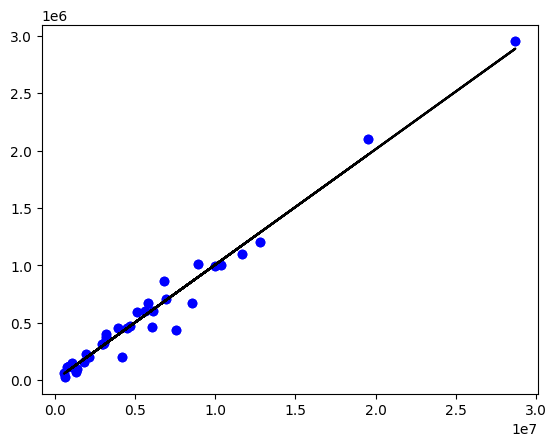

In [ ]:
#Sheel's edits: two buttons to run the linear regression with and without wb
#issues: doesn't clear the image; instead, it displays one after another and then replaces all with final output

#also, each run doesn't remove the prevous run's graph!! 

#NOTE: when running with given w and b that are very far from optimized w and b, the scale of the
#plot changes. The scatterplot isn't changing, the best fit line is just so far off that the scale 
#was altered drastically to show both the points and line. 




def run_lin_reg_with_wb(button):
    w = w_input.value
    b = b_input.value
    

    w = float(w)
    b = float(b)

    print(w)
    print(b)

    parameters = (w, b)
    
    X = np.array(df['Population 2018']).reshape(-1, 1)
    y = np.array(df['Total Covid Cases']).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

    alpha = 10 ** -16
    iterations = 1000
    num_image_updates = 20


    # parameters = linear_regression_EDITED(X_test, y_test, alpha, iterations, num_image_updates, True, w, b)

    # print(parameters)

    y_pred = np.empty([len(X_test), 1])
    for i in range(len(X_test)):
        y_pred[i] = parameters[0]*X_test[i] + parameters[1]
    

    plt.scatter(X_test, y_test, color ='b')
    plt.plot(X_test, y_pred, color ='k')
    plt.show()


def run_lin_reg_without_wb(button):
    #set w and b to 0, not important because not used
    w = 0
    b = 0

    parameters = (0, 0)

    X = np.array(df['Population 2018']).reshape(-1, 1)
    y = np.array(df['Total Covid Cases']).reshape(-1, 1)

    #with this button clicked, user did NOT provided us with w and b
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=0.3)

    alpha = 10 ** -16
    iterations = 1000
    num_image_updates = 20

    #with this button clicked, user did NOT provided us with w and b
    parameters = linear_regression_EDITED(X_test, y_test, alpha, iterations, num_image_updates, False, w, b)

    print(parameters)

    y_pred = np.empty([len(X_test), 1])
    for i in range(len(X_test)):
        y_pred[i] = parameters[0]*X_test[i] + parameters[1]

    plt.scatter(X_test, y_test, color ='b')
    plt.plot(X_test, y_pred, color ='k')
    plt.show()


#User buttons and text boxes
w_input = widgets.Text(description='w:')
b_input = widgets.Text(description='b:')
run_button_with_wb = widgets.Button(description='Run WITH w and b')
run_button_with_wb.on_click(run_lin_reg_with_wb)
run_button_without_wb = widgets.Button(description='Run WITHOUT w and b')
run_button_without_wb.on_click(run_lin_reg_without_wb)
output = widgets.Output()

display(w_input, b_input,run_button_with_wb, run_button_without_wb, output)

### Joey's Edits


Joey's work 

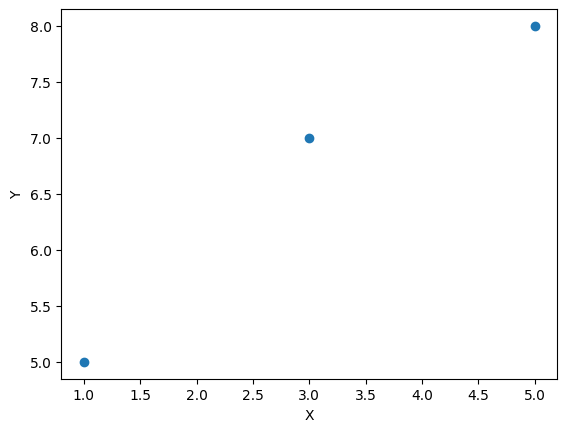

In [18]:


text_box1 = Text(value='', placeholder='x1, x2, .....', description='X')
text_box2 = Text(value='', placeholder='y1, y2, .....', description='Y')
button = Button(description='Enter')

def on_button_click(b):
    x_input = text_box1.value
    y_input = text_box2.value
    # parse the data and create a plot 
    x_values = x_input.split(',')
    y_values = y_input.split(',')
    data = [(float(x_values[i]), float(y_values[i])) for i in range(min(len(x_values), len(y_values)))]
    plt.scatter(*zip(*data))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


button.on_click(on_button_click)

input_box = HBox([text_box1, text_box2])
output_box = VBox([input_box, button])
output_box



In [ ]:
#Sheel's Work: plot button for w and b line